# Detecção de comunidades

In [48]:
#Bibliotecas necessárias
!pip install python-louvain
!pip install leidenalg
!pip install cairocffi
!pip install --upgrade scipy
!pip install --upgrade networkx[default]

#No linux precisei instalar antes do pycairo: sudo apt install libcairo2-dev pkg-config python3-dev
!pip install pycairo

Requirement already up-to-date: scipy in /home/thiago/.local/lib/python3.8/site-packages (1.8.0)
Requirement already up-to-date: networkx[default] in /home/thiago/.local/lib/python3.8/site-packages (2.7.1)


## Demonstração do Louvain

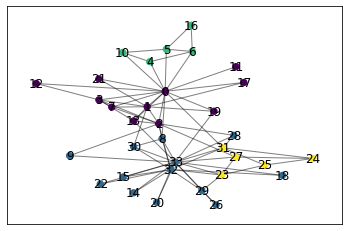

In [49]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

#Exemplo base da biblioteca

# Rede do clube de karatê
G = nx.karate_club_graph()

# usa o Louvain para computar a melhor partição
partition = community_louvain.best_partition(G)


# Plot do grafo

#Layout
pos = nx.spring_layout(G)


# Cores para representar uma comunidade em particular
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

nx.draw_networkx_labels(G, pos=pos)

plt.show()


## Demonstração do Leiden

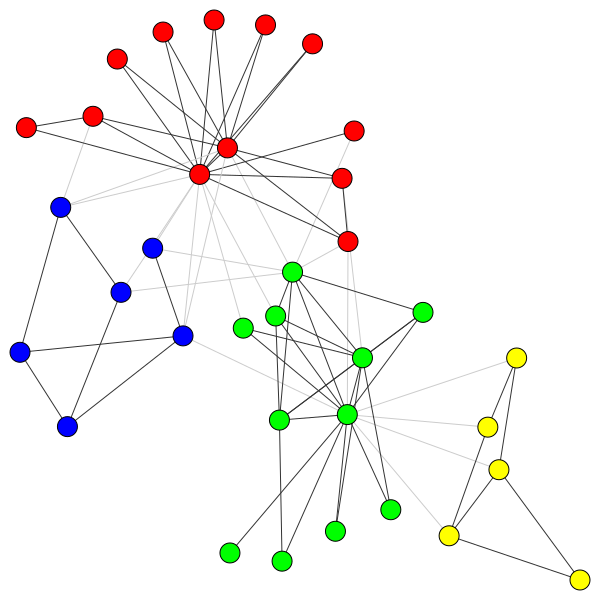

In [50]:
import leidenalg as la
import igraph as ig

#O leiden necessita do pacote iGraph - uso da mesma rede do clube de karatê
H = ig.Graph.Famous('Zachary')

partition = la.find_partition(H, la.ModularityVertexPartition)

ig.plot(partition) 


In [51]:
print(partition.membership)
print(partition.modularity)

[1, 1, 1, 1, 3, 3, 3, 1, 0, 0, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0]
0.4197896120973044


## K-clique

In [1]:
import networkx as nx
from networkx.algorithms.community import k_clique_communities

G = nx.karate_club_graph()


c = list(k_clique_communities(G, 4))

for i in c:
    print(sorted(list(i)))


[0, 1, 2, 3, 7, 13]
[8, 30, 32, 33]
[23, 29, 32, 33]


## Rede do Facebook

In [2]:
G_facebook = nx.read_edgelist("facebook_combined.txt",create_using = nx.Graph(), nodetype = int)

print(nx.info(G_facebook))

Graph with 4039 nodes and 88234 edges


<ipython-input-2-15e215c0c9cd>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_facebook))


#### Visualização da rede

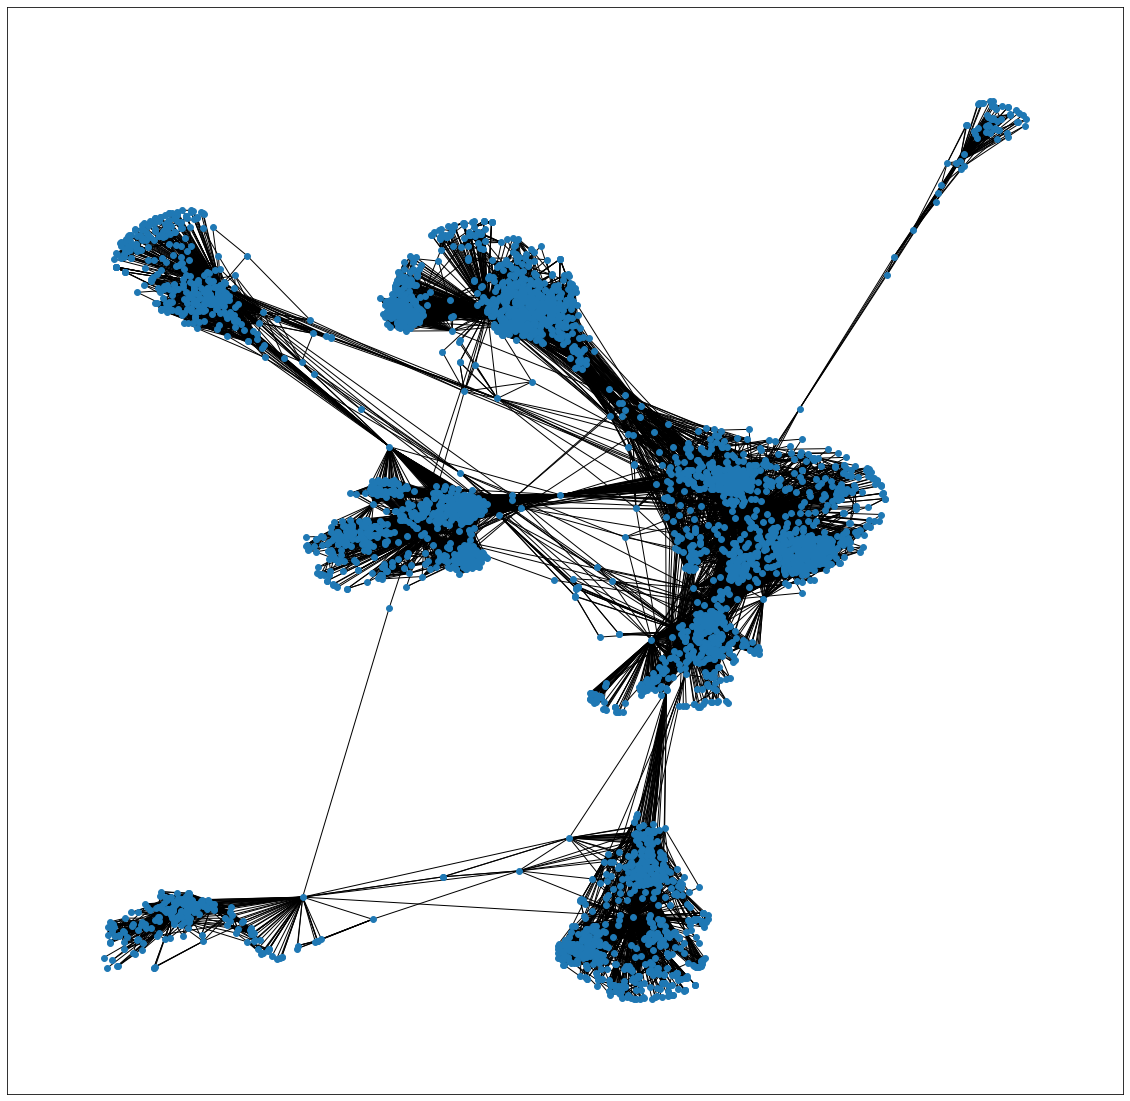

In [11]:
# Simula o force-directed layout
sp = nx.spring_layout(G_facebook)

plt.figure(figsize=(20,20))
nx.draw_networkx(G_facebook, pos=sp, with_labels=False, node_size=35)

#### Visualização das comunidades com o Louvain

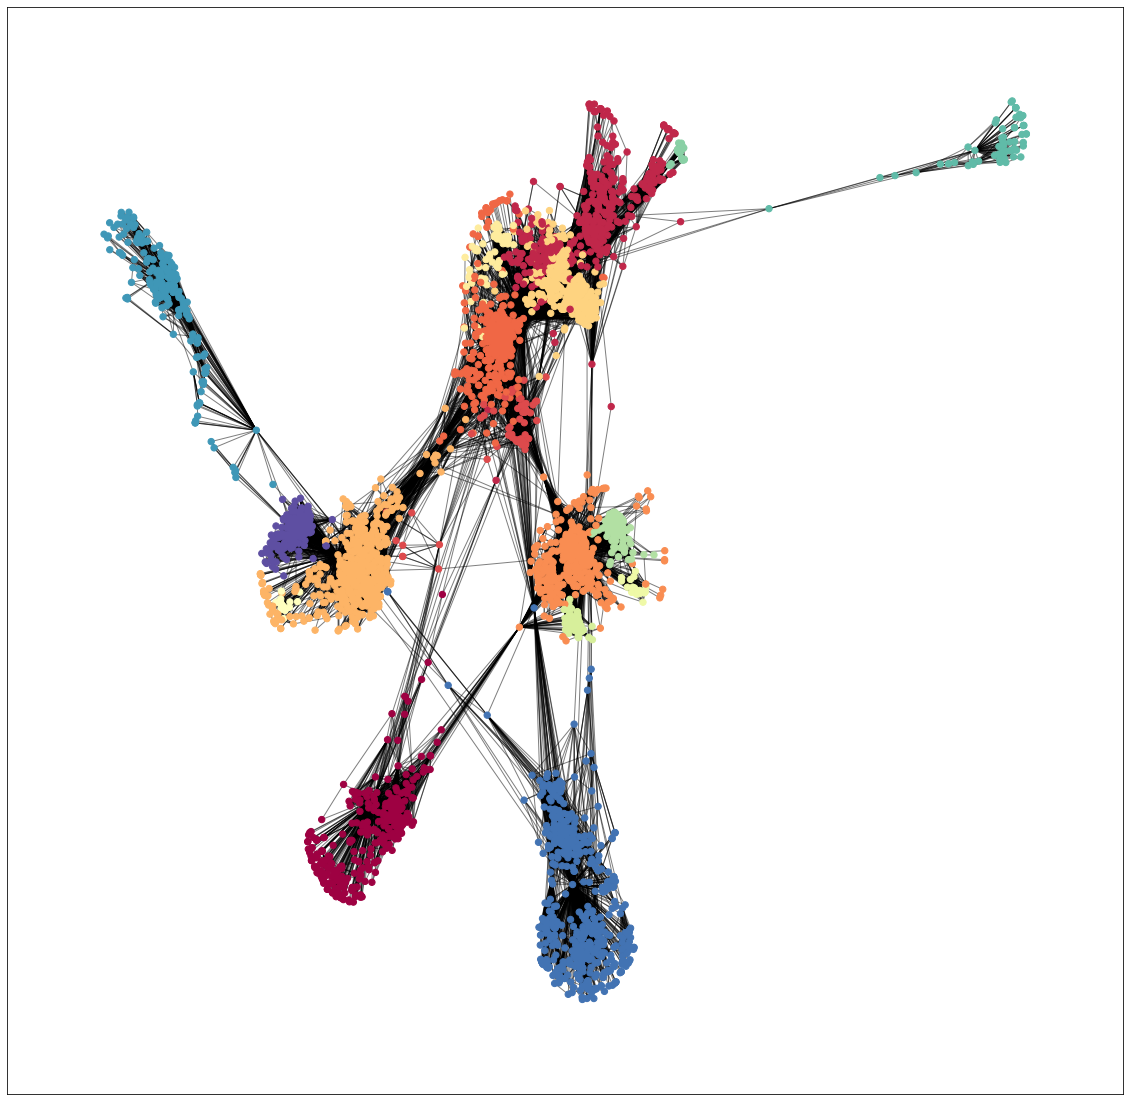

In [10]:
import matplotlib.cm as cm
import community as community_louvain
import matplotlib.pyplot as plt
import networkx as nx

clustersFace = community_louvain.best_partition(G_facebook)

cmap = cm.get_cmap('Spectral', max(clustersFace.values()) + 1)
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G_facebook, sp, clustersFace.keys(), node_size=40, cmap=cmap, node_color=list(clustersFace.values()))
nx.draw_networkx_edges(G_facebook, sp, alpha=0.5)
plt.show()

#### Visualização das comunidades com o Louvain e nós redimensionados de acordo com o betweenness

(-0.8992206600308418,
 1.1804689314961432,
 -0.7181129831075669,
 0.6327398198843003)

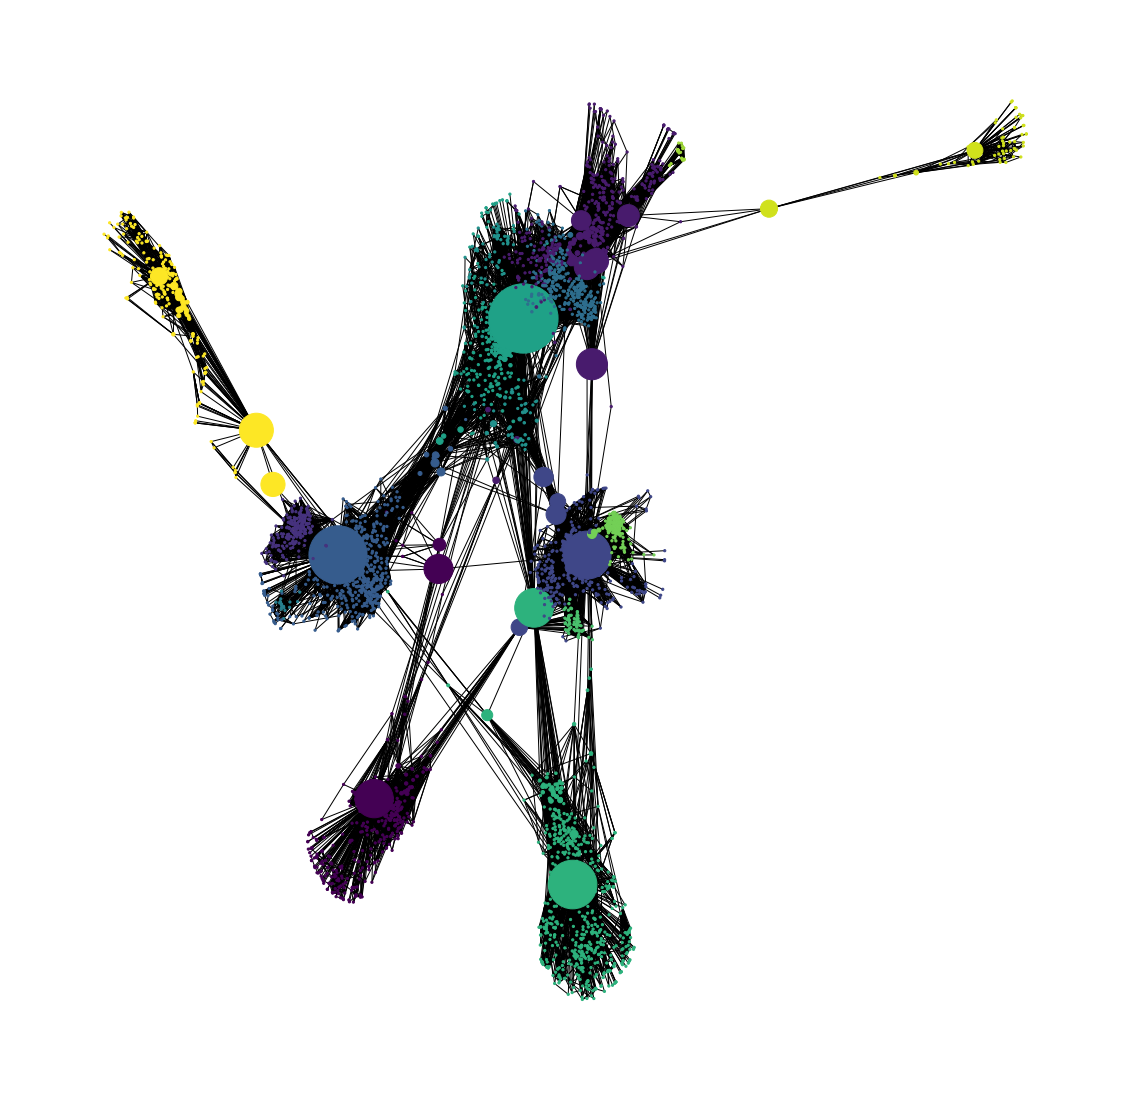

In [8]:
#arts = c.best_partition(G_fb)
clustersFace

values = [clustersFace.get(node) for node in G_facebook.nodes()]
#pos = nx.spring_layout(G_fb)

betweennessCentrality = nx.betweenness_centrality(G_facebook, normalized=True, endpoints=True)


#Configurações visuais
node_size =  [v * 10000 for v in betweennessCentrality.values()]

plt.figure(figsize=(20,20))

nx.draw_networkx(G_facebook, pos=sp, with_labels=False,
                 node_color=values,
                 node_size=node_size )
plt.axis('off')

## Rede de produtos da Amazon

In [13]:
G_amazon = nx.read_edgelist('com-amazon.ungraph.txt')
print(nx.info(G_amazon))

Graph with 334863 nodes and 925872 edges


<ipython-input-13-55d147ecde56>:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_amazon))


In [14]:
clustersAmazon = list(k_clique_communities(G_amazon,5))

for i in clustersAmazon:
    print(sorted(list(i)))

['13003', '287471', '340177', '364971', '384327', '408189', '500128', '69859']
['143561', '213866', '229374', '356665', '389313', '444928', '469878', '499036', '499889', '513667', '77484']
['105459', '137425', '190561', '373764', '539530', '545548', '545606', '546413']
['115914', '232402', '278672', '315408', '41743', '49344', '495573', '541529', '544257', '66396']
['194192', '203470', '209827', '217972', '383227', '400877', '410071']
['342582', '343803', '357139', '397652', '517399', '52177']
['132455', '147308', '194384', '197579', '207154', '213014', '214318', '224024', '260877', '290348', '320865', '331209', '333194', '336675', '351239', '353904', '368691', '377854', '384320', '402979', '42329', '438001', '459407', '460845', '467170', '493000', '495695', '528330', '84712', '88650']
['106209', '126702', '197247', '262851', '286590', '361069', '402476', '40694', '443607', '503067', '529838', '53900']
['394046', '428193', '428498', '44450', '489415', '489424', '73933', '73934', '73938

['143265', '258504', '357327', '428554', '462313']
['143265', '248854', '301636', '392951', '394612', '428554', '462313', '69979', '90027']
['143265', '400846', '462313', '4926', '69979']
['12698', '14673', '151817', '398795', '422176', '476976', '53057']
['282007', '345627', '394983', '93360', '99312']
['276769', '390035', '394983', '429392', '99312']
['198665', '245520', '276769', '282007', '99312']
['292302', '426470', '487151', '488009', '52864']
['165006', '235175', '26154', '263820', '399753']
['103113', '163458', '247016', '407958', '467019', '498640', '64611']
['159946', '184216', '201955', '267807', '330119', '520399']
['254850', '256704', '285029', '360501', '504266']
['183449', '215388', '229472', '316014', '357515', '471597', '66859']
['300926', '323825', '36583', '509778', '68744']
['134474', '179837', '272459', '373573', '411975', '43117', '533186', '60497', '60514']
['10654', '125100', '138446', '14394', '14401', '195458', '228556', '237914', '239410', '239421', '239423'

['109917', '147292', '268183', '377586', '52679']
['151389', '161905', '278551', '508918', '91611']
['153536', '228670', '526916', '79492', '97619']
['11653', '124070', '13771', '230794', '334737', '381245', '400993', '425862', '523369']
['13398', '197310', '277495', '437082', '452300', '522208', '82261', '82263']
['437082', '452300', '457602', '457606', '82261']
['110223', '11560', '425994', '440908', '464697', '476368', '65737', '76924']
['168961', '264241', '358409', '46602', '540902']
['138837', '214765', '428877', '438944', '514464']
['14253', '213237', '308353', '325639', '34894', '410715', '446550', '495022']
['162679', '329392', '360913', '406413', '462094', '470788', '513208', '531790', '95461']
['174046', '174062', '175607', '283872', '312292', '316775', '374335', '98517']
['160798', '233468', '257621', '281988', '353931', '501902', '522415']
['295616', '31575', '345283', '357036', '398579', '484106', '485719']
['29335', '29345', '29348', '312660', '371821', '371824', '395795

In [65]:
# Comunidades validadas

'com-amazon.all.dedup.cmty.txt'


'com-amazon.all.dedup.cmty.txt'

## Conteúdo extra: Visualização com o Netwulf

In [23]:
#!pip install netwulf

import netwulf as nw
nw.visualize(G_facebook)